## 대표적인 데이터 구조: 링크드 리스트 (Linked List)

### 1. 링크드 리스트 (Linked List) 구조
* 연결 리스트라고도 함
* 배열은 순차적으로 연결된 공간을 미리 예약하여 데이터를 나열하는 데이터 구조
* 링크드 리스트는 떨어진 곳에 존재하는 데이터를 화살표로 연결해서 관리하는 데이터 구조
* 연결 리스트는 배열의 단점을 극복한 자료구조
* <font color='#BF360C'>본래 C언어에서는 주요한 데이터 구조이지만, 파이썬은 리스트 타입이 링크드 리스트의 기능을 모두 지원</font>

* 링크드 리스트 기본 구조와 용어
  - 노드(Node): 데이터 저장 단위 (데이터값, 포인터) 로 구성
  - 포인터(pointer): 각 노드 안에서, 다음이나 이전의 노드와의 연결 정보를 가지고 있는 공간  

* 배열은 데이터만 저장, 링크드 리스트는 데이터 + 다음 데이터를 가리키는 주소(포인터를 저장할 공간)가 하나의 데이터(=노드)

<br>
* 일반적인 링크드 리스트 형태
<img src="https://www.fun-coding.org/00_Images/linkedlist.png" />
(출처: wikipedia, https://en.wikipedia.org/wiki/Linked_list)

### 2. 간단한 링크드 리스트 예

#### Node 구현
- 보통 파이썬에서 링크드 리스트 구현시, 파이썬 클래스를 활용함
  - 파이썬 객체지향 문법 이해 필요
  - 참고: https://www.fun-coding.org/PL&OOP1-3.html

In [1]:
class Node:  # 하나의 노드 안에 두 가지 데이터를 저장할 수 있어야 함.
              # 따라서 클래스를 사용한 객체 지향 문법을 사용
    def __init__(self, data):  # 클래스가 객체화 될 때마다 초기화(노드 생성됨)
        self.data = data
        self.next = None

In [2]:
# 개선된 형태의 Node class 선언
class Node:
    def __init__(self, data, next=None):  # 인자를 data 하나만 입력하면, next에는 defalult 값인 None이 들어감
                                           # data와 다음 주소 인자까지 2개의 인자를 입력받을 수 있음
        self.data = data
        self.next = next

#### Node와 Node 연결하기 (포인터 활용)

In [4]:
node1 = Node(1)
node2 = Node(2)
node1.next = node2
head = node1  # 가장 앞에 있는 노드의 주소만 지정해주면, 뒤의 노드들이 차례로 연결되어 링크드 리스트를 구성함

#### 링크드 리스트로 데이터 추가하기

In [3]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

def add(data):
    node = head
    while node.next:       # 특정 노드의 주소 공간이 None 값이다 = 마지막 노드
        node = node.next
    node.next = Node(data) # 마지막 노드의 주소 공간이 지금 생성한 노드(객체)를 가리키게 함

In [ ]:
# case 1
node1 = Node(1)
node2 = Node(2)
node1.next = node2
head = node1
for index in range(3,11):
    add(index)

In [ ]:
# case 2
node1 = Node(1)
head = node1
for index in range(1,10):
    add(index)

In [4]:
node1 = Node(1)
head = node1
for index in range(2, 10):
    add(index)

#### 링크드 리스트 데이터 출력하기(검색하기)

In [5]:
# 순회 : 포인터를 따라 링크드 리스트에 저장된 데이터를 출력
node = head
while node.next:   # node.next != None 일 때까지만 반복문 실행
    print(node.data)
    node = node.next
print (node.data)

1
2
3
4
5
6
7
8
9


### 3. 링크드 리스트의 장단점 (전통적인 C언어에서의 배열과 링크드 리스트)
* 장점
  - 데이터 공간을 미리 할당하지 않아도 됨 + 데이터 공간들이 일렬로 연결될 필요 없음
    - 배열은 **미리 (연결된) 데이터 공간을 할당** 해야 함
* 단점
  - 연결을 위한 별도 데이터 공간이 필요하므로, 저장공간 효율이 높지 않음
  - 연결 정보를 찾는 시간이 필요하므로 접근 속도가 느림 (<-> 배열은 인덱스 번호로 원하는 데이터에 바로 접근할 수 있다)
  - 중간 데이터 삭제시, 앞뒤 데이터의 연결을 재구성해야 하는 부가적인 작업 필요

### 4. 링크드 리스트의 복잡한 기능1 (링크드 리스트 데이터 사이에 데이터를 추가)
- 링크드 리스트는 유지 관리에 부가적인 구현이 필요함

<img src="https://www.fun-coding.org/00_Images/linkedlistadd.png" />
(출처: wikipedia, https://en.wikipedia.org/wiki/Linked_list)

In [11]:
node = head
while node.next:
    print(node.data)
    node = node.next
print (node.data)

1
2
3
4
5
6
7
8
9


In [12]:
node3 = Node(1.5)

In [13]:
# 노드를 중간에 삽입하려면 데이터 연결을 재구성해야 한다.
node = head
search = True
while search:
    if node.data == 1:  # 노드 1.5를 노드 1과 노드 2 사이에 삽입하려면 우선 노드 1을 찾아야 함
        search = False
    else:
        node = node.next

node_next = node.next  # 삽입 전 : 기존에는 node.next(node1의 포인터가 저장된 공간)는 node3를 가리켰다.
node.next = node3
node3.next = node_next

In [14]:
node = head
while node.next:
    print(node.data)
    node = node.next
print (node.data)

1
1.5
2
3
4
5
6
7
8
9


### 5. 파이썬 객체지향 프로그래밍으로 링크드 리스트 구현하기

In [15]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
    
class NodeMgmt:  # Node Management class : 링크드 리스트를 관리하는 클래스
    def __init__(self, data):
        self.head = Node(data)  # 맨 앞에 있는 노드의 주소를 알고 있어야, 전체 링크드 리스트를 검색하거나 추가하는 작업을 할 수 있다/ 
        
    def add(self, data):      # 맨 마지막 위치에 노드를 추가
        if self.head == '':   # 방어코드 : head에 데이터가 없을 때 
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(data)  # node.next == None일 때(마지막 노드), 인자값을 데이터 공간에 저장
        
    def desc(self):  # description : 해당 링크드 리스트의 전체 데이터를 출력하는 함수(by 순회)
        node = self.head
        while node:
            print (node.data)  # data는 attribute
            node = node.next

In [16]:
linkedlist1 = NodeMgmt(0)
linkedlist1.desc()

# 0이라는 데이터를 가진 노드 객체가 생성됨 -> 노드가 self.head(NodeMgmt class의 attribute 값으로 저장됨)
# -> 객체가 linkedlist1 변수에 바인딩됨 -> 그 객체의 desc 함수를 호출하면 head가 0부터 시작해 순회하면서 노드에 있는 데이터 값 출력  

0


In [17]:
for data in range(1, 10):
    linkedlist1.add(data)
linkedlist1.desc()

0
1
2
3
4
5
6
7
8
9


### 6. 링크드 리스트의 복잡한 기능2 (특정 노드를 삭제)
case 1. head 삭제         (뒤에 있는 노드를 head로 만들어야 함)  
case 2. 마지막 노드 삭제  (앞에 있는 노드의 주소값을 None으로 바꿔줘야 함)  
case 3. 중간 노드 삭제    (앞에 있는 노드의 주소값을 뒤에 있는 노드로 바꿔줘야 함)  

* 다음 코드는 위의 코드에서 delete 메서드만 추가한 것이므로 해당 메서드만 확인하면 됨

In [18]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
    
class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
        
    def add(self, data):
        if self.head == '':
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(data)
        
    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next
    
    def delete(self, data):
        if self.head == '':   # 방어 코드
            print ("해당 값을 가진 노드가 없습니다.")
            return            # 값을 반환하지 않고 그냥 끝낸다
        
        if self.head.data == data:    # case 1. head를 삭제하는 경우
            temp = self.head
            self.head = self.head.next
            del temp                  # 객체 삭제
        
        else:                         # case2,3. 중간 노드, 마지막 노드 삭제  
            node = self.head          # head(node1)가 node  -> node.next는 node2
            while node.next:
                if node.next.data == data:
                    temp = node.next
                    node.next = node.next.next  # node.next.next = node3
                    del temp   
                    return
                else:  
                    node = node.next

#### 테스트를 위해 1개 노드를 만들어 봄

In [19]:
linkedlist1 = NodeMgmt(0)
linkedlist1.desc()

0


#### head 가 살아있음을 확인

In [20]:
linkedlist1.head   # 0번 노드가 생성되었음

#### head 를 지워봄(위에서 언급한 경우의 수1)

In [21]:
linkedlist1.delete(0)

#### 다음 코드 실행시 아무것도 안나온다는 것은 linkedlist1.head 가 정상적으로 삭제되었음을 의미

In [22]:
linkedlist1.head  # 해당 객체가 삭제되었음

#### 다시 하나의 노드를 만들어봄

In [23]:
linkedlist1 = NodeMgmt(0)
linkedlist1.desc()

0


#### 이번엔 여러 노드를 더 추가해봄

In [24]:
for data in range(1, 10):
    linkedlist1.add(data)
linkedlist1.desc()

0
1
2
3
4
5
6
7
8
9


#### 노드 중에 한개를 삭제함 (위에서 언급한 경우의 수2)

In [25]:
# 중간 노드 삭제하기
linkedlist1.delete(4)

#### 특정 노드가 삭제되었음을 알 수 있음

In [26]:
linkedlist1.desc()

0
1
2
3
5
6
7
8
9


In [27]:
# 마지막 노드 삭제하기
linkedlist1.delete(9)

In [28]:
linkedlist1.desc()

0
1
2
3
5
6
7
8


<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습1: 위 코드에서 노드 데이터가 2인 노드 삭제해보기</font></strong>
</div>

In [ ]:
node_mgmt.delete(2)
node_mgmt.desc()

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습2: 위 코드에서 노드 데이터가 특정 숫자인 노드를 찾는 함수를 만들고, 테스트해보기</font></strong><br>
테스트: 임의로 1 ~ 9까지 데이터를 링크드 리스트에 넣어보고, 데이터 값이 4인 노드의 데이터 값 출력해보기
</div>

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
    
    def add(self, data):
        if self.head == '':
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(data)

    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next

    def delete(self, data):
        if self.head == '':
            print ('해당 값을 가진 노드가 없습니다.')
            return
        if self.head.data == data: # 경우의 수1: self.head를 삭제해야할 경우 - self.head를 바꿔줘야 함
            temp = self.head # self.head 객체를 삭제하기 위해, 임시로 temp에 담아서 객체를 삭제했음
            self.head = self.head.next # 만약 self.head 객체를 삭제하면, 이 코드가 실행이 안되기 때문!
            del temp
        else:
            node = self.head
            while node.next: # 경우의 수2: self.head가 아닌 노드를 삭제해야할 경우
                if node.next.data == data:
                    temp = node.next
                    node.next = node.next.next       
                    del temp                         
                    pass                             
                else:
                    node = node.next
                    
    def search_node(self, data):  # 특정 데이터 값을 가진 노드를 찾아가는 함수
        node = self.head
        while node:
            if node.data == data:
                return node
            else:
                node = node.next

In [ ]:
# 테스트
node_mgmt = NodeMgmt(0)
for data in range(1, 10):
    node_mgmt.add(data)

node = node_mgmt.search_node(4)
print (node.data)

### 7. 다양한 링크드 리스트 구조 
* 더블 링크드 리스트(Doubly linked list) 기본 구조 
  - 이중 연결 리스트라고도 함
  - 장점: 양방향으로 연결되어 있어서 노드 탐색이 양쪽으로 모두 가능
       - 항상 head에서부터 탐색이 가능한 링크드 리스트의 단점을 보완
  <br>
<img src="https://www.fun-coding.org/00_Images/doublelinkedlist.png" />
(출처: wikipedia, https://en.wikipedia.org/wiki/Linked_list)

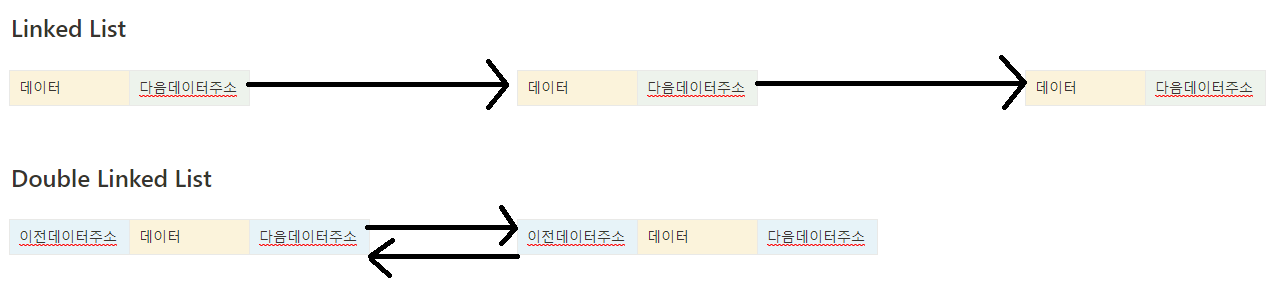

In [2]:
class Node:
    def __init__(self, data, prev=None, next=None):
        self.prev = prev
        self.data = data
        self.next = next

class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
        self.tail = self.head

    def insert(self, data):      # 맨 마지막 위치에 새로운 데이터를 추가하고, 새로 생성된 노드를 tail 노드로 만드는 함수
        if self.head == None:   # head node가 없다면
            self.head = Node(data)
            self.tail = self.head
        else:                   # head node가 있다면
            node = self.head
            while node.next:    # 마지막 노드라면, node.next == None이 되어 종료됨
                node = node.next
            new = Node(data)    # 반복이 끝나면 None을 가리키는 노드(기존의 tail node)
            node.next = new
            new.prev = node
            self.tail = new     

    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next

In [3]:
double_linked_list = NodeMgmt(0)  # head 생성(데이터 공간에 0이 저장되어 있음)
for data in range(1, 10):
    double_linked_list.insert(data)
double_linked_list.desc()

0
1
2
3
4
5
6
7
8
9


<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습3: 위 코드에서 노드 데이터가 특정 숫자인 노드 앞에 데이터를 추가하는 함수를 만들고, 테스트해보기</font></strong><br>
- 더블 링크드 리스트의 tail 에서부터 뒤로 이동하며, 특정 숫자인 노드를 찾는 방식으로 함수를 구현하기<br>
- 테스트: 임의로 0 ~ 9까지 데이터를 링크드 리스트에 넣어보고, 데이터 값이 2인 노드 앞에 1.5 데이터 값을 가진 노드를 추가해보기
</div>

In [7]:
class Node:
    def __init__(self, data, prev=None, next=None):
        self.prev = prev
        self.data = data
        self.next = next

class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
        self.tail = self.head

    def insert(self, data):
        if self.head == None:
            self.head = Node(data)
            self.tail = self.head
        else:
            node = self.head
            while node.next:
                node = node.next
            new = Node(data)
            node.next = new
            new.prev = node
            self.tail = new

    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next
    
    def search_from_head(self, data):
        if self.head == None:
            return False
    
        node = self.head
        while node:
            if node.data == data:
                return node
            else:
                node = node.next
        return False
    
    def search_from_tail(self, data):
        if self.head == None:   # 방어 코드
            return False  
    
        node = self.tail
        while node:
            if node.data == data:
                return node
            else:
                node = node.prev
        return False    # 해당 데이터를 가진 노드가 없는 경우 false
    
    def insert_before(self, data, before_data):  # before_data 값을 가진 노드 앞에 새로운 data를 갖는 노드를 추가
        if self.head == None:
            self.head = Node(data)
            return True
        else:
            node = self.tail
            while node.data != before_data:
                node = node.prev
                if node == None:  # 특정 데이터를 가진 노드가 없다면, 노드 앞에 데이 터를 삽입할 수도 없음
                    return False
            new = Node(data)
            before_new = node.prev
            before_new.next = new
            new.prev = before_new
            new.next = node
            node.prev = new
            return True

In [9]:
double_linked_list = NodeMgmt(0)
for data in range(1, 10):
    double_linked_list.insert(data)
double_linked_list.desc()

0
1
2
3
4
5
6
7
8
9


In [12]:
node_3 = double_linked_list.search_from_head(3)
node_3.data

3

In [13]:
# double_linked_list에 없는 데이터를 search한다면?
node_3 = double_linked_list.search_from_head(10)
if node_3:
    print(node_3.data)
else:
    print("No data")

No data


In [15]:
# 내가 찾고자 하는 데이터가 뒤에서부터 찾는 게 더 빠르다면 
node_3 = double_linked_list.search_from_tail(3)
node_3.data

3

In [18]:
double_linked_list.insert_before(1.5, 2)
double_linked_list.desc()

0
1
1.5
2
3
4
5
6
7
8
9


In [19]:
node_3 = double_linked_list.search_from_tail(1.5)
node_3.data

1.5

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습4: 위 코드에서 노드 데이터가 특정 숫자인 노드 뒤에 데이터를 추가하는 함수를 만들고, 테스트해보기</font></strong><br>
- 더블 링크드 리스트의 head 에서부터 다음으로 이동하며, 특정 숫자인 노드를 찾는 방식으로 함수를 구현하기<br>
- 테스트: 임의로 0 ~ 9까지 데이터를 링크드 리스트에 넣어보고, 데이터 값이 1인 노드 다음에 1.7 데이터 값을 가진 노드를 추가해보기
</div>

In [ ]:
class Node:
    def __init__(self, data, prev=None, next=None):
        self.prev = prev
        self.data = data
        self.next = next

class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
        self.tail = self.head
    
    def insert_before(self, data, before_data):
        if self.head == None:
            self.head = Node(data)
            return True            
        else:
            node = self.tail
            while node.data != before_data:
                node = node.prev
                if node == None:
                    return False
            new = Node(data)
            before_new = node.prev
            before_new.next = new
            new.next = node
            return True

    def insert_after(self, data, after_data):
        if self.head == None:
            self.head = Node(data)
            return True            
        else:
            node = self.head
            while node.data != after_data:
                node = node.next
                if node == None:
                    return False
            new = Node(data)
            after_new = node.next
            new.next = after_new
            new.prev = node
            node.next = new
            if new.next == None:
                self.tail = new
            return True

    def insert(self, data):
        if self.head == None:
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            new = Node(data)
            node.next = new
            new.prev = node
            self.tail = new

    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next

In [ ]:
node_mgmt = NodeMgmt(0)
for data in range(1, 10):
    node_mgmt.insert(data)

node_mgmt.desc()

node_mgmt.insert_after(1.5, 1)
node_mgmt.desc()